# 目的：熟悉Pandas套件的使用

1. [序列(Series)：詞頻表](#01)
2. [以index檢查序列索引](#02)
3. [以loc(), iloc()提取序列內容](#03)
4. [以apply()對序列做處理](#04)
5. [畫詞頻圖](#05)
6. [序列(Series)：高斯分佈](#06)
7. [畫盒鬚圖](#07)
8. [資料表(DataFrame)](#08)
9. [以loc()或iloc()做資料的選取](#09)
10. [groupby()](#10)
11. [以屬性indices檢查groupby後的結果](#11)
12. [我們可用for將一個個群從群集裡取出](#12)
13. [用get_group(2)將群集內的第二個群取出](#13)
14. [groupby完之後，可以用sum()做加總](#14)
15. [或以describe()來對個群做一些簡單統計](#15)
16. [產生一個亂數時間序列資料，用來了解groupby, aggregate, transform, filter](#16)
17. [接著我們將資料groupby年以後，以transform()對資料做轉換](#17)
18. [groupby後，除了以transform()做轉換，我們亦可用agg()做聚合，計算各群的平均和標準差](#18)
19. [groupby後，以filter()過濾出符合判斷式的群](#19)
20. [未定義(NaN)的處理](#20)

# 練習(手寫數字)

手寫數字資料可載於[此](http://honghu.wengscafe.de:35703/mnist.tar.gz)

1. [選出數字為7的path,並告訴我數字為7的資料有幾筆](#ex00)
2.  [各手寫數字分別有幾張圖?](#ex01)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os

根據數據的維度，Pandas可將資料存成序列(series) 或資料表(data frame)。以下將各別針對序列和資料表做介紹。

### <a id="01"/>序列(Series)：詞頻表

可將Python字典存成Pandas序列。字典格式為 {索引1:索引值1, 索引2:索引值2, 索引3:索引值3,...}。

In [2]:
adjs={'affordable': 1,
 'comfortable': 3,
 'comparable': 1,
 'different': 1,
 'disappointed': 1,
 'fantastic': 1,
 'good': 8,
 'great': 15}

In [3]:
ser=pd.Series(adjs)

以[ ]方法取出序列中的前三筆資料

In [4]:
ser[:3]

affordable     1
comfortable    3
comparable     1
dtype: int64

[回索引](#目的：熟悉Pandas套件的使用)

### <a id="02"/>以index檢查序列索引

In [5]:
ser.index

Index(['affordable', 'comfortable', 'comparable', 'different', 'disappointed',
       'fantastic', 'good', 'great'],
      dtype='object')

[回索引](#目的：熟悉Pandas套件的使用)

### <a id="03"/>以loc(), iloc()提取序列內容

以[索引名稱]可提取和該索引名稱相應的索引值。

In [6]:
ser['comfortable']

3

In [7]:
for ind in ser.index:
    print(ind,ser[ind])

affordable 1
comfortable 3
comparable 1
different 1
disappointed 1
fantastic 1
good 8
great 15


ser[索引名稱] 等同於使用 ser.loc[索引名稱]：

In [8]:
for ind in ser.index:
    print(ind,ser.loc[ind])

affordable 1
comfortable 3
comparable 1
different 1
disappointed 1
fantastic 1
good 8
great 15


以iloc[索引排序]可提取對應該索引排序的索引值。索引排序是整數，代表該筆資料在序列內的順位。

In [9]:
for i,ind in enumerate(ser.index):
    print(ind,ser[ind])
    print(ind,ser.iloc[i])
    print('------------')

affordable 1
affordable 1
------------
comfortable 3
comfortable 3
------------
comparable 1
comparable 1
------------
different 1
different 1
------------
disappointed 1
disappointed 1
------------
fantastic 1
fantastic 1
------------
good 8
good 8
------------
great 15
great 15
------------


[回索引](#目的：熟悉Pandas套件的使用)

### <a id="04"/>以apply()對序列做處理

In [10]:
ser

affordable       1
comfortable      3
comparable       1
different        1
disappointed     1
fantastic        1
good             8
great           15
dtype: int64

利用apply()將序列內的每個值+1。

In [11]:
ser.apply(lambda x:x+1)

affordable       2
comfortable      4
comparable       2
different        2
disappointed     2
fantastic        2
good             9
great           16
dtype: int64

[回索引](#目的：熟悉Pandas套件的使用)

### <a id="05"/>畫詞頻圖

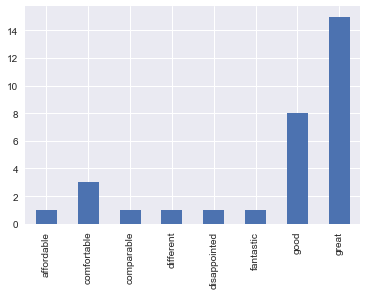

In [12]:
ser.plot.bar()

以上等同於：

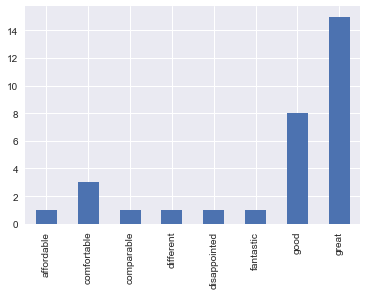

In [13]:
ser.plot(kind='bar')

[回索引](#目的：熟悉Pandas套件的使用)

### <a id="06"/>序列(Series)：高斯分佈

我們亦可不提供索引，直接輸入一個無索引, 非字典形式的序列給Pandas：

In [14]:
ser=pd.Series(np.random.normal(0,1,1000))

In [15]:
ser[:5]

0    0.662271
1   -0.861667
2   -0.979769
3    0.694060
4    0.570367
dtype: float64

由於並無提供索引，索引會以流水號從0開始自動產生。

In [16]:
ser.shape

(1000,)

[回索引](#目的：熟悉Pandas套件的使用)

### <a id="07"/>畫盒鬚圖

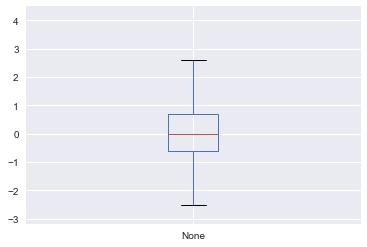

In [17]:
ser.plot.box()

以上結果等同於：

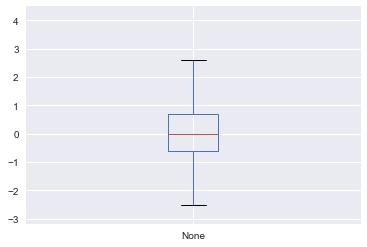

In [18]:
ser.plot(kind='box')

我們先前使用了 pd.Series(序列) 讓序列自動產生由0開始遞增的索引。而若是我們想要自己提供索引，我們仍然可使用 pd.Series(序列，索引序列) 建立自帶索引的序列。

In [19]:
ser=pd.Series(np.random.normal(0,1,1000), index=np.random.choice(['A','B'],1000))

In [20]:
ser.head(5)

B    0.596829
B   -0.951155
B    0.849164
A    0.391505
A    0.243697
dtype: float64

複習
* 給字典(key:value)，則索引為key
* 給一維序列不給索引，則索引為流水號
* 給兩個等長的一維序列，則一個為資料，一個為資料的索引

[回索引](#目的：熟悉Pandas套件的使用)

### <a id="08"/>資料表(DataFrame)

以下我們建立一個有三個行，且索引為自動流水號的資料表。

我們可以提供{行名稱1：行序列1,行名稱2：行序列2,行名稱3：行序列3,...}給pandas.DataFrame()建構資料表。

In [21]:
a=[1,2,3]*2
b=[1, 2, 3, 10, 20, 30]
c=np.array(b)*2

In [22]:
df=pd.DataFrame({'col1':a,'col2':b,'col3':c})

In [23]:
df

,col1,col2,col3
0,1,1,2
1,2,2,4
2,3,3,6
3,1,10,20
4,2,20,40
5,3,30,60


#### 直接於df物件之後加[欄位名稱]可選取欄位

In [24]:
df['col2']

0     1
1     2
2     3
3    10
4    20
5    30
Name: col2, dtype: int64

[回索引](#目的：熟悉Pandas套件的使用)

### <a id="09"/>以loc()或iloc()做資料的選取

用loc或iloc時機：當你不只想選取欄位，也想選取特定索引範圍時。

#### 以loc[索引名稱,行的名稱] 可擷取一部分範圍的資料表

例：選出索引0,1,2；列為col2的資料

In [25]:
df.loc[0:2,'col2']

0    1
1    2
2    3
Name: col2, dtype: int64

以上範例索引為數值，因此可以用$0:2$的方式，選出索引由$0$至$2$ ($0,1,2$) 的資料列。

例：選出索引為0,1,2, 列為col1和col2的資料

In [26]:
df.loc[0:2,['col1','col2']]

,col1,col2
0,1,1
1,2,2
2,3,3


In [27]:
df

,col1,col2,col3
0,1,1,2
1,2,2,4
2,3,3,6
3,1,10,20
4,2,20,40
5,3,30,60


選取位於'col'行中等於1的列

In [28]:
df['col1']==1

0     True
1    False
2    False
3     True
4    False
5    False
Name: col1, dtype: bool

In [29]:
df[df['col1']==1]

,col1,col2,col3
0,1,1,2
3,1,10,20


先依條件df['col1']==1選定資料，再指定要選取的欄位是'col2'

In [30]:
df.loc[df['col1']==1,'col2']

0     1
3    10
Name: col2, dtype: int64

亦可使用iloc(索引排序,行排序),根據索引排序和行排序來選取資料

In [31]:
df

,col1,col2,col3
0,1,1,2
1,2,2,4
2,3,3,6
3,1,10,20
4,2,20,40
5,3,30,60


In [32]:
df.iloc[0:2,1]

0    1
1    2
Name: col2, dtype: int64

[回索引](#目的：熟悉Pandas套件的使用)

# <a id="ex00"/>練習0：選出數字為7的path,並告訴我數字為7的資料有幾筆



In [33]:
def filePathsGen(rootPath):
    paths=[]
    dirs=[]
    for dirPath,dirNames,fileNames in os.walk(rootPath):
        for fileName in fileNames:
            fullPath=os.path.join(dirPath,fileName)
            paths.append((int(dirPath[len(rootPath) ]),fullPath))
        dirs.append(dirNames)
    return dirs,paths

dirs,paths=filePathsGen('mnist/') #載入圖片路徑

dfPath=pd.DataFrame(paths,columns=['class','path']) #圖片路徑存成Pandas資料表
dfPath.head(5) # 看資料表前5個row

,class,path
0,6,mnist/6/09305.jpg
1,6,mnist/6/36425.jpg
2,6,mnist/6/19142.jpg
3,6,mnist/6/02126.jpg
4,6,mnist/6/28084.jpg


In [ ]:
# 完成以下程式碼：
dfPath[...]

[回索引](#目的：熟悉Pandas套件的使用)

---

### <a id="10"/>groupby()

Pandas 可做各種等同於SQL查詢的處理，詳見Pandas和SQL指令的比較：

http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

現在，我們首先來介紹，SQL查詢指令中常見的groupby，於pandas是該怎麼做呢？

In [35]:
df

,col1,col2,col3
0,1,1,2
1,2,2,4
2,3,3,6
3,1,10,20
4,2,20,40
5,3,30,60


以行'col1'來做groupby

In [36]:
grouped=df.groupby('col1')

[回索引](#目的：熟悉Pandas套件的使用)

### <a id="11"/>以屬性indices檢查groupby後的結果

In [37]:
grouped.indices

{1: array([0, 3]), 2: array([1, 4]), 3: array([2, 5])}

現在，grouped這個物件是一個群集，裡面有三個群。其中，群為1的有索引是0和索引是3的這兩列，群為2的有索引是1和索引是4的這兩列，群為3的有索引是2和索引是5的這兩列。

[回索引](#目的：熟悉Pandas套件的使用)

### <a id="12"/>我們可用for將一個個群從群集裡取出

In [38]:
for name,group in grouped:
    print(name)
    print(group)
    print('--------------')

1
   col1  col2  col3
0     1     1     2
3     1    10    20
--------------
2
   col1  col2  col3
1     2     2     4
4     2    20    40
--------------
3
   col1  col2  col3
2     3     3     6
5     3    30    60
--------------


直接以* 將群集展開

In [39]:
print(*grouped)

(1,    col1  col2  col3
0     1     1     2
3     1    10    20) (2,    col1  col2  col3
1     2     2     4
4     2    20    40) (3,    col1  col2  col3
2     3     3     6
5     3    30    60)


[回索引](#目的：熟悉Pandas套件的使用)

### <a id="13"/>用get_group(2)將群集內的第二個群取出

In [40]:
grouped.get_group(2)

,col1,col2,col3
1,2,2,4
4,2,20,40


[回索引](#目的：熟悉Pandas套件的使用)

### <a id="14"/>groupby完之後，可以用sum()做加總

In [41]:
grouped.sum()

,col2,col3
col1,,
1,11,22
2,22,44
3,33,66


[回索引](#目的：熟悉Pandas套件的使用)

### <a id="15"/>或以describe()來對個群做一些簡單統計

In [42]:
grouped.describe()

col2                                                 col3        \
     count  mean        std  min   25%   50%    75%   max count  mean   
col1                                                                    
1      2.0   5.5   6.363961  1.0  3.25   5.5   7.75  10.0   2.0  11.0   
2      2.0  11.0  12.727922  2.0  6.50  11.0  15.50  20.0   2.0  22.0   
3      2.0  16.5  19.091883  3.0  9.75  16.5  23.25  30.0   2.0  33.0   

                                              
            std  min   25%   50%   75%   max  
col1                                          
1     12.727922  2.0   6.5  11.0  15.5  20.0  
2     25.455844  4.0  13.0  22.0  31.0  40.0  
3     38.183766  6.0  19.5  33.0  46.5  60.0

[回索引](#目的：熟悉Pandas套件的使用)

---

### <a id="16"/>產生一個亂數時間序列資料，用來了解groupby, aggregate, transform, filter

現在，我們來製作一個亂數產生的時間序列。我們將利用它來學習，於群聚(groupby)之後，如何將得到的群集做聚合 (aggregate)，轉換 (transform)或過濾 (filter)，進而得出想要的結果。

以下我們要亂數產生一個時間序列的範例資料。首先，先產生$365\times2$個日期

In [43]:
dates = pd.date_range('2017/1/1', periods=365*2,freq='D')

建立一個時間序列，以剛剛產生的日期當做索引。序列的前365個亂數是由常態分佈$N(\mu=0,\sigma=1)$抽取出來的樣本，而後365個亂數則是由常態分佈$N(\mu=6,\sigma=1)$抽取出來的樣本。

以下，我們以水平方向堆疊(horizontal stack)兩個不同分佈的亂數序列，將其輸入給pd.Series()。

In [44]:
dat=pd.Series(np.hstack( (np.random.normal(0,1,365),np.random.normal(6,1,365) )) ,dates)

In [45]:
dat[:5]

2017-01-01   -0.371970
2017-01-02    0.373264
2017-01-03    0.626532
2017-01-04   -1.732281
2017-01-05    0.602206
Freq: D, dtype: float64

接著我們將序列以年來分群。

In [46]:
grouped=pd.Series(dat).groupby(lambda x:x.year)

In [47]:
grouped.indices

{2017: array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 17

顯而易見，因2017和2018年的資料是不同的亂數分佈產生的，所以畫出來這兩年的資料是分開的。

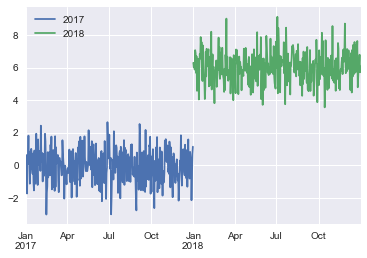

In [48]:
for name,group in grouped:
    group.plot(label=name,legend=True)

畫直方圖(histogram)，可發現兩組數據的確類似常態分佈，一個中心約在x=0處，另一個中心約在x=6處。

法一

2017    Axes(0.125,0.125;0.775x0.755)
2018    Axes(0.125,0.125;0.775x0.755)
dtype: object

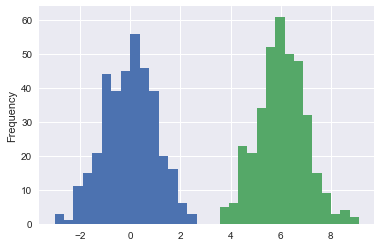

In [49]:
grouped.plot.hist(15)

法二(有畫出兩組資料的標籤)

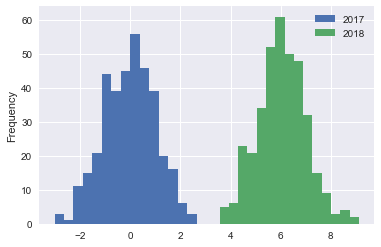

In [50]:
for name,group in grouped:
    group.plot.hist(15,label=name,legend=True)

盒鬚圖(boxplot)

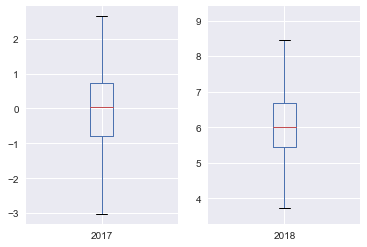

In [51]:
fig,axes=plt.subplots(1,2)
for idx,(name,group) in enumerate(grouped):
    group.plot(kind='box', label=name,ax=axes[idx])

接著我們想畫盒鬚圖(boxplot)。在這裡遇到一個問題，也就是boxplot()這個方法只有物件是DataFrame才有，物件是Series尚無此方法。因此我們只好將序列(Series)轉成DataFrame。

註：我們想用boxplot這個方法，因為它可以寫一行就幫我們自動分群，畫出盒鬚圖。

In [52]:
dat.name='random variables'

將序列dat轉成DataFrame並且將日期索引變成行。

In [53]:
datNew=dat.to_frame().reset_index()

將日期欄位取年的部份，存到一個欄位叫做'year'。

In [54]:
datNew['year']=datNew['index'].apply(lambda x:x.year)

將原先是索引的日期欄位刪除。

In [55]:
del datNew['index']

最終我們產生了新的資料表，可以用'year'這個欄位來做groupby。

In [56]:
datNew[:5]

,random variables,year
0,-0.371970,2017
1,0.373264,2017
2,0.626532,2017
3,-1.732281,2017
4,0.602206,2017


最後以boxplot()畫盒鬚圖並以年做groupby。

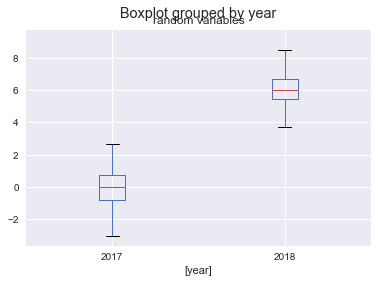

In [57]:
datNew.boxplot(by='year')

從盒鬚圖可看出，2017年的亂數資料平均值靠近0, 而2018年的亂數資料平均值靠近6。這符合我們的預期。

用seaborn畫可能會漂亮些：

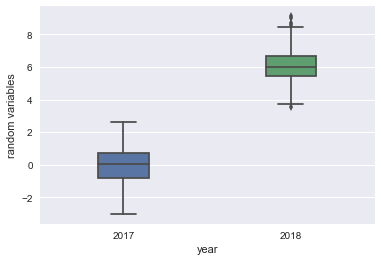

In [58]:
sns.boxplot(data=datNew,x='year',y='random variables',width=0.3)

In [59]:
dat[:5]

2017-01-01   -0.371970
2017-01-02    0.373264
2017-01-03    0.626532
2017-01-04   -1.732281
2017-01-05    0.602206
Freq: D, Name: random variables, dtype: float64

[回索引](#目的：熟悉Pandas套件的使用)

### <a id="17"/>接著我們將資料groupby年以後，以transform()對資料做轉換

以下我們想做的事情是將常態分佈的亂數做標準化，也就是將$x\sim N(\mu,\sigma)$轉換成 $x_{new}=\frac{x-\mu}{\sigma}\sim N(0,1)$。

https://en.wikipedia.org/wiki/Standard_score

In [60]:
grouped=dat.groupby(lambda x:x.year)

In [61]:
transformed = grouped.transform(lambda x: (x - x.mean()) / x.std())

In [62]:
transformed[:5]

2017-01-01   -0.331176
2017-01-02    0.390167
2017-01-03    0.635315
2017-01-04   -1.647877
2017-01-05    0.611769
Freq: D, Name: random variables, dtype: float64

In [63]:
len(transformed)

730

畫圖比較轉換前和轉換後的序列

In [64]:
compare = pd.DataFrame({'before transformation': dat, 'after transformation': transformed})

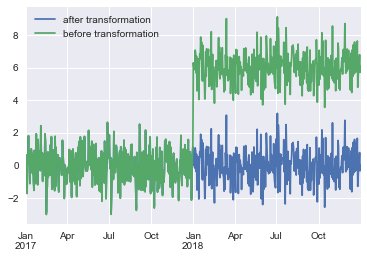

In [65]:
compare.plot()

轉換後，2018年的資料和2017年的資料有相同的分佈

[回索引](#目的：熟悉Pandas套件的使用)

### <a id="18"/>groupby後，除了以transform()做轉換，我們亦可用agg()做聚合，計算各群的平均和標準差

將原資料做groupby

In [66]:
groups=dat.groupby(lambda x:x.year)

將轉換後資料做groupby

In [67]:
groupsTrans=transformed.groupby(lambda x:x.year)

計算原資料各群平均

In [68]:
groups.agg(np.mean)

2017   -0.029825
2018    6.042517
Name: random variables, dtype: float64

計算原資料各群標準差

In [69]:
groups.agg(np.std)

2017    1.033121
2018    0.964905
Name: random variables, dtype: float64

計算轉換後資料各群平均

In [70]:
groupsTrans.agg(np.mean)

2017   -3.893385e-17
2018    5.975909e-16
Name: random variables, dtype: float64

計算轉換後資料各群標準差

In [71]:
groupsTrans.agg(np.std)

2017    1.0
2018    1.0
Name: random variables, dtype: float64

[回索引](#目的：熟悉Pandas套件的使用)

### <a id="19"/>groupby後，以filter()過濾出符合判斷式的群

例如說，我們想找出平均數是小於5的群集。由先前所畫的圖，或是由數據產生的方式，我們知道2017年這個群，平均數是小於五，因此我們可使用np.abs(x.mean())<5 這個條件過濾出2017年的群集資料。

In [72]:
filtered=groups.filter(lambda x: np.abs(x.mean())<5)

In [73]:
len(filtered)

365

In [74]:
filtered[:5]

2017-01-01   -0.371970
2017-01-02    0.373264
2017-01-03    0.626532
2017-01-04   -1.732281
2017-01-05    0.602206
Freq: D, Name: random variables, dtype: float64

相同的，我們知道2018年這個群，平均數是大於五，因此我們可使用np.abs(x.mean())>5 這個條件過濾出2018年的群集資料。

In [75]:
filtered=groups.filter(lambda x: np.abs(x.mean())>5)

In [76]:
len(filtered)

365

In [77]:
filtered[:5]

2018-01-01    6.294807
2018-01-02    6.046058
2018-01-03    6.268796
2018-01-04    5.880699
2018-01-05    7.076418
Freq: D, Name: random variables, dtype: float64

使用np.abs(x.mean())>6 將找不到任何群集的資料。

In [78]:
filtered=groups.filter(lambda x: np.abs(x.mean())>6)

In [79]:
len(filtered)

365

使用np.abs(x.mean())<6 將得到屬於任何群集的資料。

In [80]:
filtered=groups.filter(lambda x: np.abs(x.mean())<6)

In [81]:
len(filtered)

365

In [82]:
filtered[:5]

2017-01-01   -0.371970
2017-01-02    0.373264
2017-01-03    0.626532
2017-01-04   -1.732281
2017-01-05    0.602206
Freq: D, Name: random variables, dtype: float64

In [83]:
filtered[-1-5:-1]

2017-12-26    0.486331
2017-12-27    0.160301
2017-12-28   -2.147014
2017-12-29   -0.629587
2017-12-30    0.700956
Freq: D, Name: random variables, dtype: float64

[回索引](#目的：熟悉Pandas套件的使用)

### <a id="20"/>未定義(NaN)的處理

In [84]:
dat=pd.Series(np.random.normal(0,1,6))

In [85]:
dat

0   -1.381010
1   -1.783321
2    0.279436
3    0.327383
4   -0.072308
5   -0.379207
dtype: float64

將索引2的值換成NaN

In [86]:
dat[2]=np.NAN

In [87]:
dat

0   -1.381010
1   -1.783321
2         NaN
3    0.327383
4   -0.072308
5   -0.379207
dtype: float64

將序列所有值往後挪動(shift)一格。此舉會導致最前面的數變成NaN。

In [88]:
shifted=dat.shift(1)

In [89]:
shifted

0         NaN
1   -1.381010
2   -1.783321
3         NaN
4    0.327383
5   -0.072308
dtype: float64

用NaN後的數來填補該NaN (backward fill)

In [90]:
shifted.bfill()

0   -1.381010
1   -1.381010
2   -1.783321
3    0.327383
4    0.327383
5   -0.072308
dtype: float64

用NaN前的數來填補該NaN (forward fill)

In [91]:
shifted.ffill()

0         NaN
1   -1.381010
2   -1.783321
3   -1.783321
4    0.327383
5   -0.072308
dtype: float64

用0來填補該NaN

In [92]:
shifted.fillna(0)

0    0.000000
1   -1.381010
2   -1.783321
3    0.000000
4    0.327383
5   -0.072308
dtype: float64

In [93]:
shifted.mean()

-0.72731414182161103

用平均數來填補該NaN

In [94]:
shifted.fillna( shifted.mean() )

0   -0.727314
1   -1.381010
2   -1.783321
3   -0.727314
4    0.327383
5   -0.072308
dtype: float64

將序列中的NaN丟棄(drop)

In [95]:
shifted.dropna()

1   -1.381010
2   -1.783321
4    0.327383
5   -0.072308
dtype: float64

[回索引](#目的：熟悉Pandas套件的使用)

### <a id="ex01"/>練習1：各手寫數字分別有幾張圖?

In [3]:
def filePathsGen(rootPath):
    paths=[]
    dirs=[]
    for dirPath,dirNames,fileNames in os.walk(rootPath):
        for fileName in fileNames:
            fullPath=os.path.join(dirPath,fileName)
            paths.append((int(dirPath[len(rootPath) ]),fullPath))
        dirs.append(dirNames)
    return dirs,paths

dirs,paths=filePathsGen('mnist/') #載入圖片路徑

dfPath=pd.DataFrame(paths,columns=['class','path']) #圖片路徑存成Pandas資料表
dfPath.head(5) # 看資料表前5個row

,class,path
0,6,mnist/6/09305.jpg
1,6,mnist/6/36425.jpg
2,6,mnist/6/19142.jpg
3,6,mnist/6/02126.jpg
4,6,mnist/6/28084.jpg


In [ ]:
# 完成以下程式碼：
...
...
groups.count()

[回索引](#目的：熟悉Pandas套件的使用)